In [7]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn; seaborn.set()
import jinja2
import re
%matplotlib inline

In [20]:
# Read the CSV file containing raw data and timestamps
df = pd.read_csv("log.csv", names=("timestamp", "value"), sep=";", index_col=0)
df.index = pd.to_datetime(df.index)

# Remove readings with invalid digits
df = df[~df.value.str.contains('_')]

# Remove alphanumeric characters
df.value = df.value.apply(lambda x: re.sub(r'[a-zA-Z]', '', x))

# Crop leading digits
df.value = df.apply(lambda x: int(str(int(x))[-4:]), axis=1)

# Remove implausible values which are below the initial reading
df = df[df.value > df.value.iloc[0]]

# Remove non-monotonic values
df = df[(df.diff() > 0)].dropna()

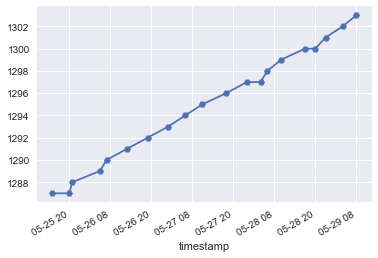

In [37]:
df[-30:-10].plot(legend=None, marker="H")